# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''
'''import sys
!{sys.executable} -m pip install pycountry_convert

import plotly as pl
import seaborn as sns
import folium as fo'''

'import sys\n!{sys.executable} -m pip install pycountry_convert\n\nimport plotly as pl\nimport seaborn as sns\nimport folium as fo'

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [4]:
print(len(confirmed_df))
confirmed_df.head()

271


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,50655,50810,50886,51039,51280,51350,51405,51526,51526,51526
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,54827,55380,55755,56254,56572,57146,57727,58316,58316,58991
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,97007,97441,97857,98249,98631,98988,99311,99610,99897,100159
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7699,7756,7806,7821,7875,7919,7983,8049,8117,8166
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,17029,17099,17149,17240,17296,17371,17433,17553,17568,17608


In [5]:
print(len(deaths_df))
deaths_df.head()

271


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2126,2139,2149,2160,2174,2179,2181,2191,2191,2191
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1125,1134,1143,1153,1164,1170,1174,1181,1181,1190
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2705,2716,2722,2728,2737,2745,2751,2756,2762,2769
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,83,83,83,83,83,84,84,84,84,84
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,393,396,399,399,403,403,405,405,405,407


In [6]:
print(len(recoveries_df))
recoveries_df.head()

256


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,40359,40444,40784,41096,41441,41543,41612,41727,41727,41727
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,30276,30790,31181,31565,32122,32700,33185,33634,33634,34353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,64777,65144,65505,65862,66214,66550,66855,67127,67395,67611
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7171,7203,7252,7288,7318,7360,7384,7432,7463,7463
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,9729,9921,9976,10354,10354,10627,10859,11044,11146,11189


#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [7]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Insert your code here:
total_cases = confirmed.sum(axis=0)
total_deaths = deaths.sum(axis=0)
mortality_rate = total_deaths / total_cases
total_recovered = recoveries.sum(axis=0)
recovery_rate = total_recovered / total_cases
total_active = total_cases - total_recovered - total_deaths

In [8]:
confirmed.head()
total_cases.head()
print(len(mortality_rate))


347


In [9]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  84586904
Total death cases:  1835788
Total recoveries cases:  47595212
Total active cases:  35155904


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

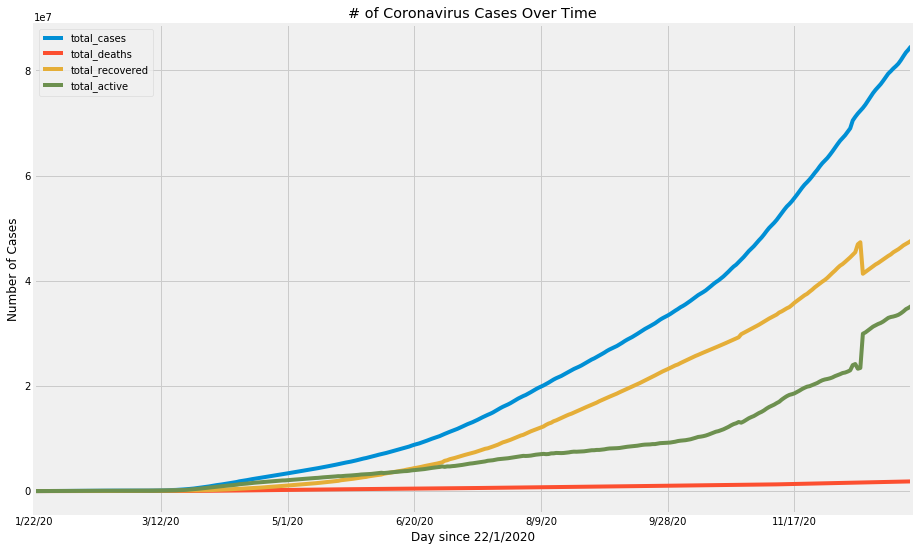

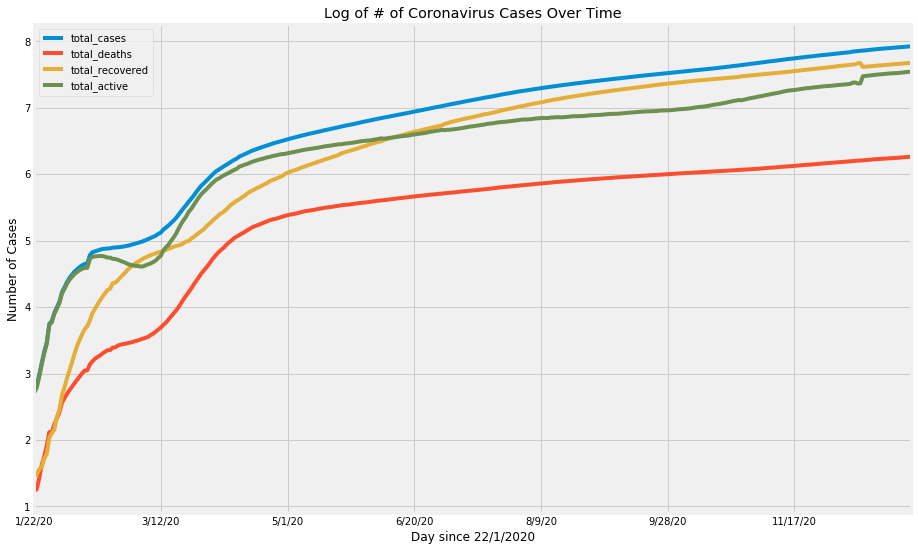

In [10]:
#cases = pd.DataFrame(total_cases.reset_index(inplace=True))
total_cases.plot(x=total_cases[0], y=total_cases[1],figsize=(14,9))
total_deaths.plot(x=total_deaths[0], y=total_deaths[1])
total_recovered.plot(x=total_recovered[0], y=total_recovered[1])
total_active.plot(x=total_active[0], y=total_active[1])
plt.legend(["total_cases","total_deaths","total_recovered","total_active"])
plt.xlabel("Day since 22/1/2020")
plt.ylabel("Number of Cases")
plt.title("# of Coronavirus Cases Over Time")
plt.show()

cases =np.log10(total_cases)
deaths=np.log10(total_deaths)
recovered=np.log10(total_recovered)
active=np.log10(total_active)
cases.plot(x=cases[0], y=cases[1],figsize=(14,9))
deaths.plot(x=deaths[0], y=deaths[1])
recovered.plot(x=recovered[0], y=recovered[1])
active.plot(x=active[0], y=active[1])
plt.legend(["total_cases","total_deaths","total_recovered","total_active"])
plt.xlabel("Day since 22/1/2020")
plt.ylabel("Number of Cases")
plt.title("Log of # of Coronavirus Cases Over Time")
plt.show()


## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

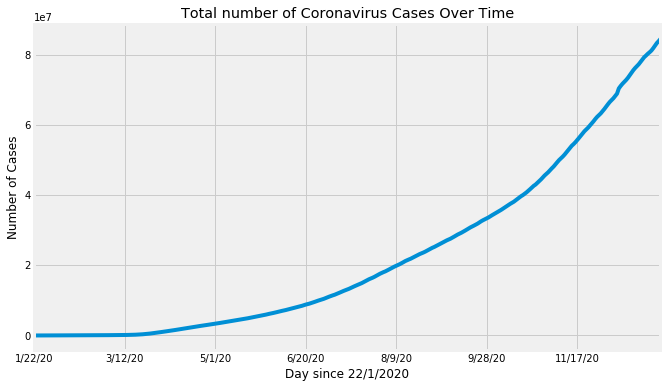

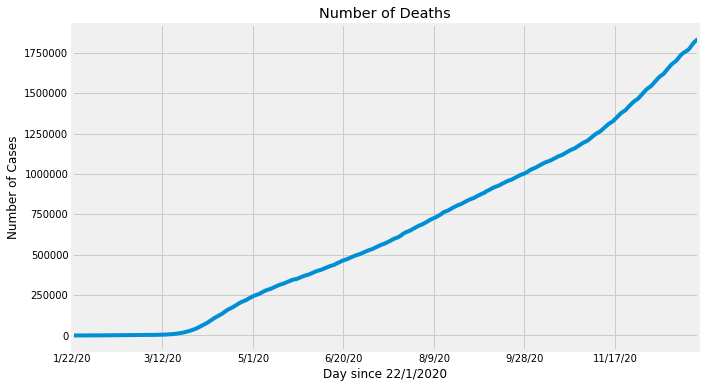

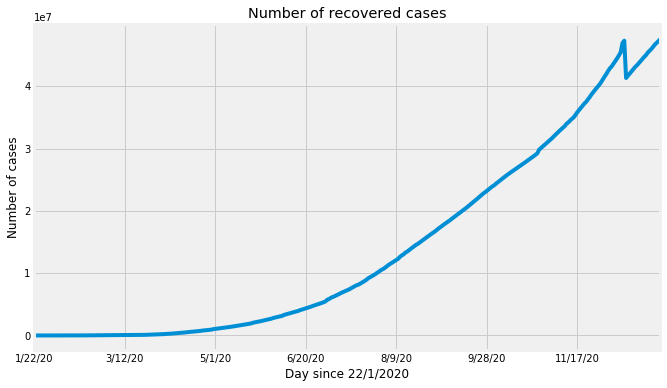

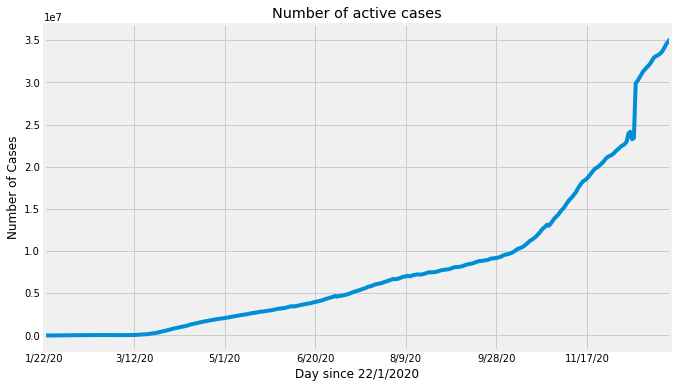

In [11]:
total_cases.plot(x=total_cases[0], y=total_cases[1],figsize=(10,6))
plt.xlabel("Day since 22/1/2020")
plt.ylabel("Number of Cases")
plt.title("Total number of Coronavirus Cases Over Time")
plt.show()
total_deaths.plot(x=total_deaths[0], y=total_deaths[1],figsize=(10,6))
plt.xlabel("Day since 22/1/2020")
plt.ylabel("Number of Cases")
plt.title("Number of Deaths")
plt.show()
total_recovered.plot(x=total_recovered[0], y=total_recovered[1],figsize=(10,6))
plt.xlabel("Day since 22/1/2020")
plt.ylabel("Number of cases")
plt.title("Number of recovered cases")
plt.show()
total_active.plot(x=total_active[0], y=total_active[1],figsize=(10,6))
plt.xlabel("Day since 22/1/2020")
plt.ylabel("Number of Cases")
plt.title("Number of active cases")
plt.show()

In [12]:
#Insert your code here:


## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [13]:
#Insert your code here:
type(total_cases)
case_total = total_cases.tolist() #transform into list
case_death = total_deaths.tolist()
case_recovered = total_recovered.tolist()
case_active =total_active.tolist()
print(len(case_total)==len(case_death)==len(case_recovered)==len(case_active)) #We see that, all these list share same length

daily_case = []; daily_death=[]; daily_recover=[]; daily_active =[] #create list of daily cases,deaths,recoveries,active

for i in range(len(case_total)-1):
    daily=case_total[i+1]-case_total[i]   #finding daily cases
    daily_case.append(daily)
    ##
    dies=case_death[i+1]-case_death[i]  #finding daily death
    daily_death.append(dies)
    ##
    recover=case_recovered[i+1]-case_recovered[i]  #finding daily recovered
    daily_recover.append(recover)
    ##
    active=case_active[i+1]-case_active[i] #finding daily active
    daily_active.append(active)
#turn back to Dataframe
daily_case =pd.DataFrame(daily_case); daily_case.columns=['Cases']
daily_death =pd.DataFrame(daily_death); daily_death.columns=['Cases']
daily_recover =pd.DataFrame(daily_recover); daily_recover.columns=['Cases']
daily_active =pd.DataFrame(daily_active); daily_active.columns=['Cases']


True


In [14]:
daily_case.head()

,Cases
0,99
1,287
2,493
3,684
4,809


## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

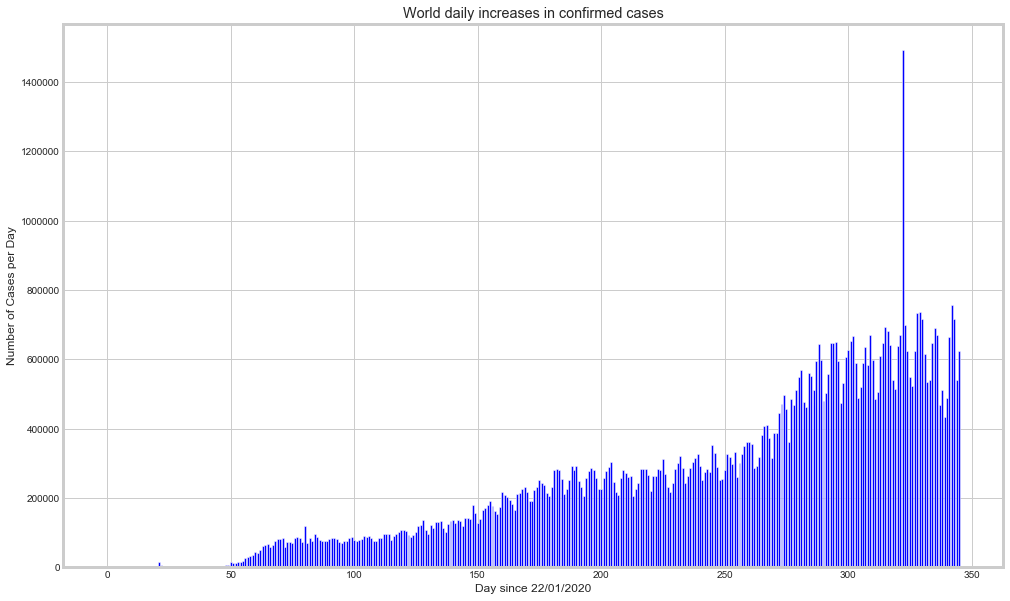

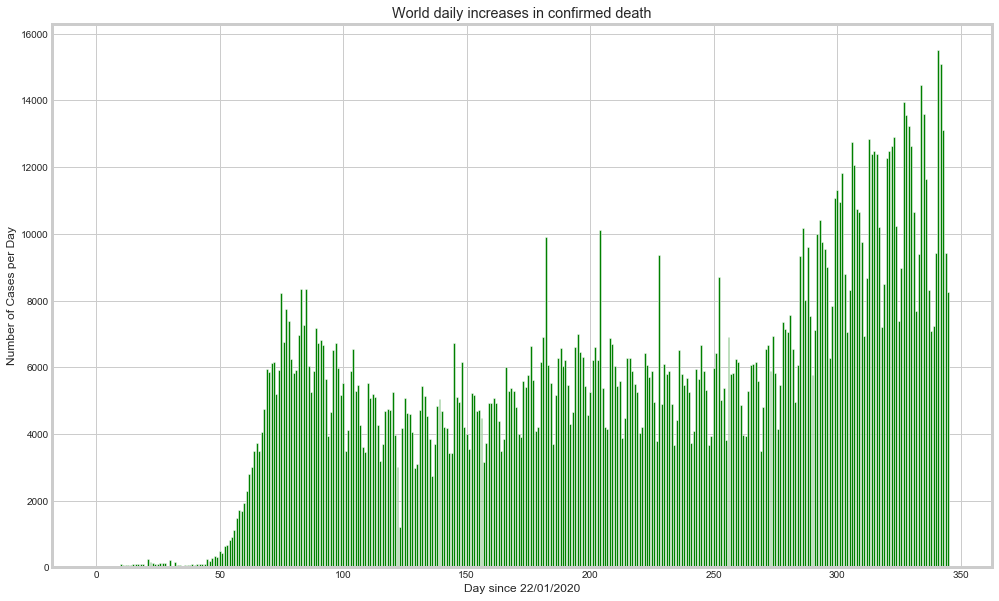

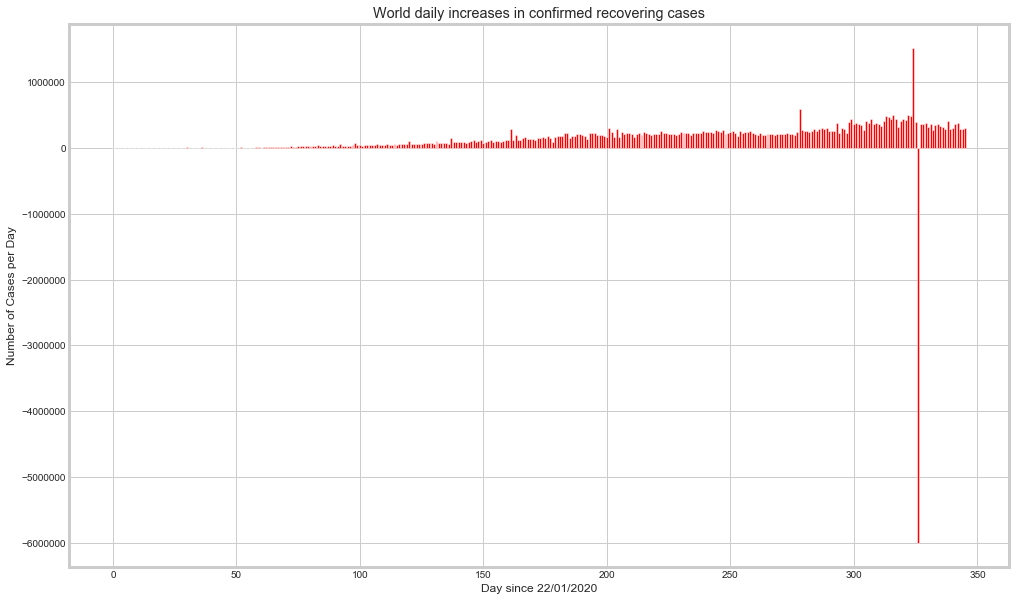

In [15]:
#####PLoTTING
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.set_palette('pastel')
plt.bar(range(len(daily_case)), daily_case['Cases'], color='blue')
plt.ylabel("Number of Cases per Day")
plt.xlabel("Day since 22/01/2020")
plt.title("World daily increases in confirmed cases")
plt.show()

##
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
plt.bar(range(len(daily_death)), daily_death['Cases'], color='green')
plt.ylabel("Number of Cases per Day")
plt.xlabel("Day since 22/01/2020")
plt.title("World daily increases in confirmed death")
plt.show()
##
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
plt.bar(range(len(daily_recover)), daily_recover['Cases'], color='red')
plt.ylabel("Number of Cases per Day")
plt.xlabel("Day since 22/01/2020")
plt.title("World daily increases in confirmed recovering cases")
plt.show()
#something was wrong with this data with day 326= -5992171.. need to calculate again
daily_recover=[]
for i in range(len(case_total)-1):
    recover=abs(case_recovered[i+1]-case_recovered[i])  #finding daily recovered
    daily_recover.append(recover)
daily_recover =pd.DataFrame(daily_recover); daily_recover.columns=['Cases']

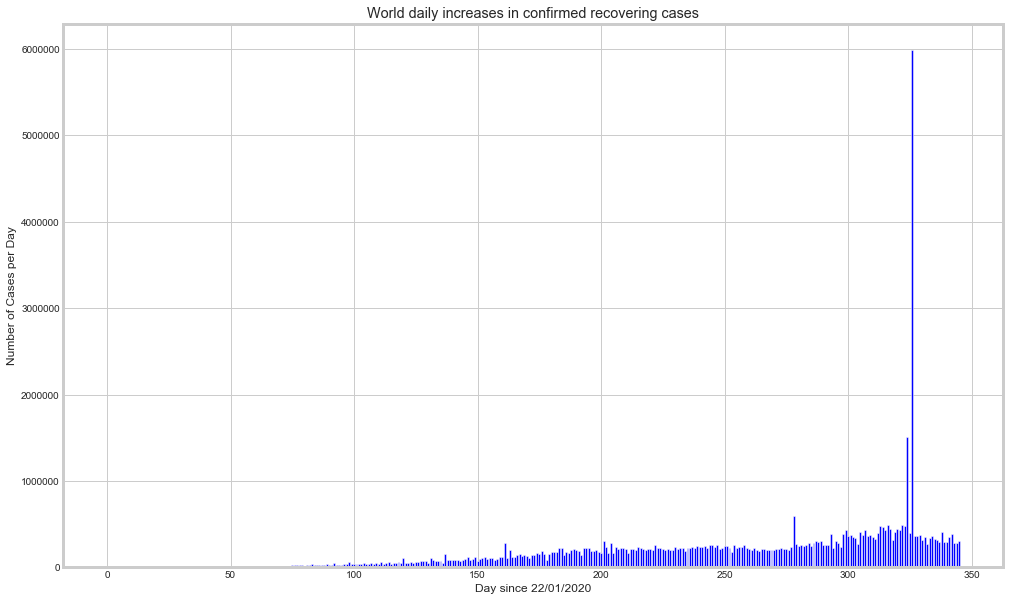

In [16]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
plt.bar(range(len(daily_recover)), daily_recover['Cases'], color='blue')
plt.ylabel("Number of Cases per Day")
plt.xlabel("Day since 22/01/2020")
plt.title("World daily increases in confirmed recovering cases")
plt.show()

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [17]:
#Insert your code here:
mortality_percen = (mortality_rate*100).tolist()
recover_percen = recovery_rate*100
#mortal_mean=np.mean(mortality_percen)
#recover_mean = np.mean(recover_percen)

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

Text(0.5, 1.0, 'Mortality Rate of Coronavirus Over Time in Percentage')

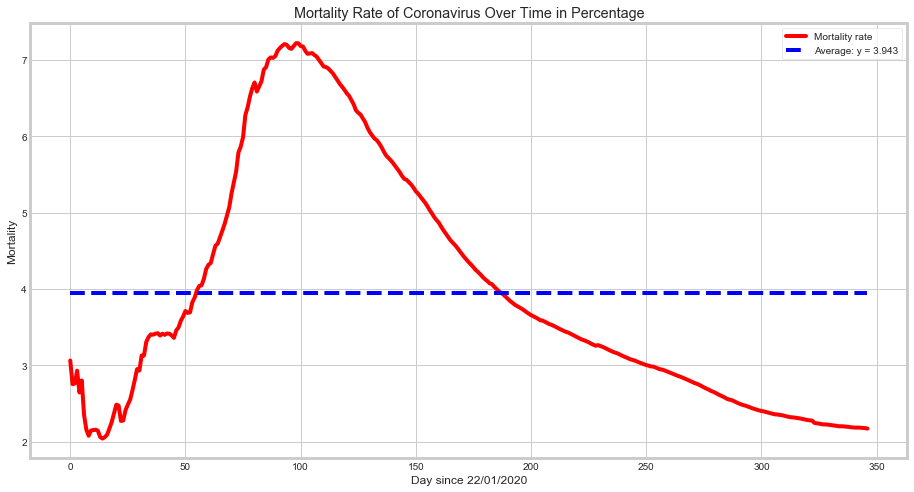

In [18]:
plt.figure(figsize=(14,8))
plt.plot(range(len(mortality_percen)),mortality_percen, color='red') #plotting mortality percentage by days
mean_line = [np.mean(mortality_percen)]*len(mortality_percen) #create a list include mean of mortality to draw it
plt.plot(range(len(mortality_percen)),mean_line,'--', color='blue')
plt.legend(['Mortality rate', 'Average: y = {}'.format(round(np.mean(mortality_percen),3))])
plt.xlabel('Day since 22/01/2020')
plt.ylabel('Mortality')
plt.title('Mortality Rate of Coronavirus Over Time in Percentage')


In [19]:
#Insert your code here:


**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

Text(0.5, 1.0, 'Recovery Rate of Coronavirus Over Time in Percentage')

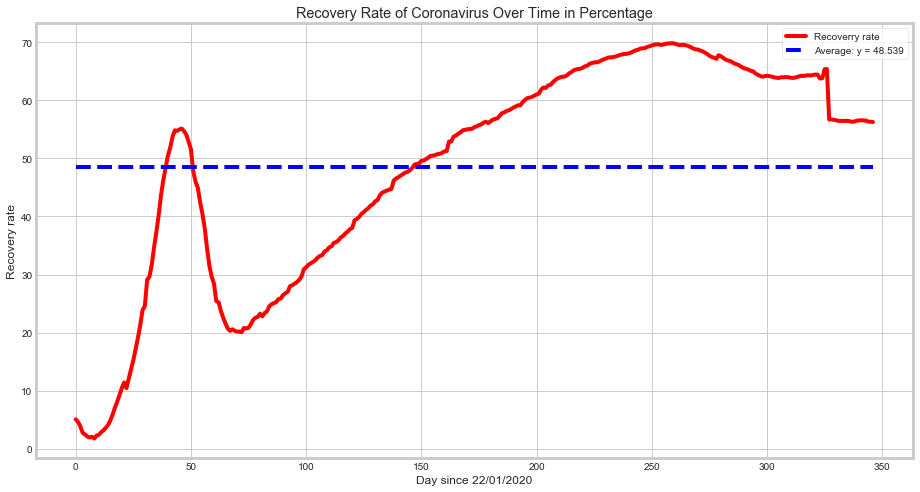

In [20]:
plt.figure(figsize=(14,8))
plt.plot(range(len(recover_percen)),recover_percen, color='red') #plotting mortality percentage by days
mean_line2 = [np.mean(recover_percen)]*len(recover_percen) #create a list include mean of mortality to draw it
plt.plot(range(len(recover_percen)),mean_line2,'--', color='blue')
plt.legend(['Recoverry rate', 'Average: y = {}'.format(round(np.mean(recover_percen),3))])
plt.xlabel('Day since 22/01/2020')
plt.ylabel('Recovery rate')
plt.title('Recovery Rate of Coronavirus Over Time in Percentage')


In [21]:
#Insert your code here:


#  5. Continent Analysis

## Data Prerocessing

In [22]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [23]:
country= (confirmed_df['Country/Region']).tolist() ##Take a list of country name
code_continent =[] #empty list
continent1=[]

for item in country:  #Find the continent code from each name of the country
    code = country_to_continent_code(item)
    code_continent.append(code)

for index in range(len(code_continent)): #retrieve full name of the continent
    if code_continent[index] == 'NA':
        continent1.append('North America')
    elif code_continent[index] == 'SA':
        continent1.append('South America')
    elif code_continent[index] == 'AS':
        continent1.append('Asia')
    elif code_continent[index] == 'OC':
        continent1.append('Australia')
    elif code_continent[index] == 'AF':
        continent1.append('Africa')
    elif code_continent[index] == 'EU':
        continent1.append('Europe')
    else:
        continent1.append('Orthers')
confirmed_df['Continent'] = continent1

####################################################################
country= (deaths_df['Country/Region']).tolist() ##Take a list of country name
code_continent =[] #empty list
continent=[]

for item in country:  #Find the continent code from each name of the country
    code = country_to_continent_code(item)
    code_continent.append(code)

for index in range(len(code_continent)): #retrieve full name of the continent
    if code_continent[index] == 'NA':
        continent.append('North America')
    elif code_continent[index] == 'SA':
        continent.append('South America')
    elif code_continent[index] == 'AS':
        continent.append('Asia')
    elif code_continent[index] == 'OC':
        continent.append('Australia')
    elif code_continent[index] == 'AF':
        continent.append('Africa')
    elif code_continent[index] == 'EU':
        continent.append('Europe')
    else:
        continent.append('Orthers')
deaths_df['Continent'] = continent
######################################################################
country= (recoveries_df['Country/Region']).tolist() ##Take a list of country name
code_continent =[] #empty list
continent3=[]

for item in country:  #Find the continent code from each name of the country
    code = country_to_continent_code(item)
    code_continent.append(code)

for index in range(len(code_continent)): #retrieve full name of the continent
    if code_continent[index] == 'NA':
        continent3.append('North America')
    elif code_continent[index] == 'SA':
        continent3.append('South America')
    elif code_continent[index] == 'AS':
        continent3.append('Asia')
    elif code_continent[index] == 'OC':
        continent3.append('Australia')
    elif code_continent[index] == 'AF':
        continent3.append('Africa')
    elif code_continent[index] == 'EU':
        continent3.append('Europe')
    else:
        continent3.append('Orthers')
recoveries_df['Continent'] = continent3

recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,Continent
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,40444,40784,41096,41441,41543,41612,41727,41727,41727,Asia
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,30790,31181,31565,32122,32700,33185,33634,33634,34353,Europe
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,65144,65505,65862,66214,66550,66855,67127,67395,67611,Africa
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7203,7252,7288,7318,7360,7384,7432,7463,7463,Europe
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,9921,9976,10354,10354,10627,10859,11044,11146,11189,Africa


In [24]:
#Insert your code here:


# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

#confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
confirmed_df.head()
confirm = pd.DataFrame(confirmed_df.loc[:, cols[-1]]) #Create a data inclue number of cases
continent1 = pd.DataFrame(continent1)
country = pd.DataFrame(confirmed_df.loc[:, cols[1]:cols[3]]) #Create a data inclue Country name

death = pd.DataFrame(deaths_df.loc[:, cols[-1]])
recovery = pd.DataFrame(recoveries_df.loc[:, cols[-1]])

active = confirm - death - recovery
mortality = round((death/confirm)*100,2)

frames = [country, continent1, confirm, death, recovery, active, mortality]
data = pd.concat(frames, axis=1)
data.columns=['Country/Region','Lat','Long','Continent','Cases','Deaths','Recoveries','Active','Mortality Rate']
data.set_index('Country/Region', inplace=True, drop=True)
data

In [25]:
#Insert your code here: #NEWWWWW############################################
confirm1 = pd.DataFrame(confirmed_df.loc[:, cols[-1]]) #Create a data inclue number of cases
continent1 = pd.DataFrame(continent1) #data of continent name
country1 = pd.DataFrame(confirmed_df.loc[:, cols[0]:cols[3]]) #Create a data inclue Country name
death1 = pd.DataFrame(deaths_df.loc[:, cols[-1]])
recovery1 = pd.DataFrame(recoveries_df.loc[:, cols[-1]])
#Create data1, which inclue Country Name, Latitude and Longtitude, we will groupby a name, and take median of Lat and Long
data1 = pd.concat([country1], axis=1)
data1.columns=['State','Country/Region','Lat','Long']
data1 = data1.groupby(by=['Country/Region']).median()

#Create data2, which inclue Country Name, confirm, death, recover, we will groupby a name, and take sum for each column
frames2=[country1, confirm1, death1, recovery1]
data2 = pd.concat(frames2, axis=1)
data2.columns=['State','Country/Region','Lat','Long','Cases','Deaths','Recoveries']
data2 = data2.groupby(by=['Country/Region']).sum()
del data2['Lat']; del data2['Long'] #remove wrong lat and long made by the sum()

#Create data3, which inclue only Country Name, and Name of its continent, we will groupby a with unique value
continent = pd.DataFrame(continent)
country_serie = pd.DataFrame(confirmed_df.loc[:, cols[1]])
data3 = pd.concat([country_serie,continent], axis=1)
data3.columns =['Country/Region','Old_continent']
data3= pd.DataFrame(data3.groupby('Country/Region').Old_continent.unique())
#But continent name will be ['Asian'], we cannot do, so we must to replace it
lst=[]
for item in data3['Old_continent']:
    if item == ['North America']:
        lst.append('North America')
    elif item == ['South America']:
        lst.append('South America')
    elif item == ['Asia']:
        lst.append('Asia')
    elif item == ['Australia']:
        lst.append('Australia')
    elif item == ['Africa']:
        lst.append('Africa')
    elif item == ['Europe']:
        lst.append('Europe')
    else:
        lst.append('Others')

data3['Continent']= lst
del data3['Old_continent']

#Combine all of them and find Active with Mortality also
data_plus= pd.concat([data1,data3, data2], axis=1)
data_plus['Active'] = data_plus['Cases'] - data_plus['Deaths'] - data_plus['Recoveries']
data_plus['Mortality Rate'] = round((data_plus['Deaths']/data_plus['Cases'])*100,2)
data_plus

,Lat,Long,Continent,Cases,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,,,
Afghanistan,33.939110,67.709953,Asia,51526,2191,41727.0,7608.0,4.25
Albania,41.153300,20.168300,Europe,58991,1190,34353.0,23448.0,2.02
Algeria,28.033900,1.659600,Africa,100159,2769,67611.0,29779.0,2.76
Andorra,42.506300,1.521800,Europe,8166,84,7463.0,619.0,1.03
Angola,-11.202700,17.873900,Africa,17608,407,11189.0,6012.0,2.31
Antigua and Barbuda,17.060800,-61.796400,North America,159,5,148.0,6.0,3.14
Argentina,-38.416100,-63.616700,South America,1634834,43375,1447092.0,144367.0,2.65
Armenia,40.069100,45.038200,Asia,159798,2836,143640.0,13322.0,1.77
Australia,-34.398650,146.145150,Australia,28484,909,25778.0,1797.0,3.19


# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [26]:
#Insert your code here:
continents_df=data_plus.sort_values(by=['Continent'])
continents_df= continents_df[['Continent','Cases','Deaths','Recoveries']]

continents_df = continents_df.groupby(by='Continent').sum()
continents_df['Active'] = abs(continents_df['Cases']-continents_df['Deaths']-continents_df['Recoveries'])
continents_df['Mortality Rate(%)'] =round((continents_df['Deaths']/continents_df['Cases'])*100,2)
continents_df.sort_values(by='Cases', ascending=False, inplace=True)
continents_df

,Cases,Deaths,Recoveries,Active,Mortality Rate(%)
Continent,,,,,
Europe,24099677,550313,10369678.0,13179686.0,2.28
North America,23429545,512189,4767722.0,18149634.0,2.19
Asia,20618491,335881,5150894.0,15131716.0,1.63
South America,13281024,364313,9869551.0,3047160.0,2.74
Africa,2808452,66639,16198747.0,13456934.0,2.37
Others,318197,5508,700448.0,387759.0,1.73
Australia,31518,945,538172.0,507599.0,3.00


## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [27]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()

# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

In [28]:
#Insert your code here:
#visualize_covid_cases(confirmed=new_df['Cases'],deaths = new_df['Deaths'])
confirmed_df.head()
confirm = pd.DataFrame(confirmed_df.loc[:, cols[4]:])
confirm = confirm.groupby(by='Continent').sum().transpose()

deaths = pd.DataFrame(deaths_df.loc[:, cols[4]:])
deaths = deaths.groupby(by='Continent').sum().transpose()
deaths

### South America
SA = pd.concat([confirm['South America'], deaths['South America']], axis=1)
SA.columns=['Cases','Deaths']
SA

### ASIA
AS = pd.concat([confirm['Asia'], deaths['Asia']], axis=1)
AS.columns=['Cases','Deaths']
AS

### EUROPE
EU = pd.concat([confirm['Europe'], deaths['Europe']], axis=1)
EU.columns=['Cases','Deaths']
EU

###AFRICA
AF = pd.concat([confirm['Africa'], deaths['Africa']], axis=1)
AF.columns=['Cases','Deaths']

###NORTH AMERICA
NA = pd.concat([confirm['North America'], deaths['North America']], axis=1)
NA.columns=['Cases','Deaths']
NA

###AUSTRALIA
OC = pd.concat([confirm['Australia'], deaths['Australia']], axis=1)
OC.columns=['Cases','Deaths']
OC

###ORTHERS
OT = pd.concat([confirm['Orthers'], deaths['Orthers']], axis=1)
OT.columns=['Cases','Deaths']

SA.tail()


,Cases,Deaths
12/29/20,13010001,359161
12/30/20,13097978,360918
12/31/20,13194159,362651
1/1/21,13241727,363563
1/2/21,13281024,364313


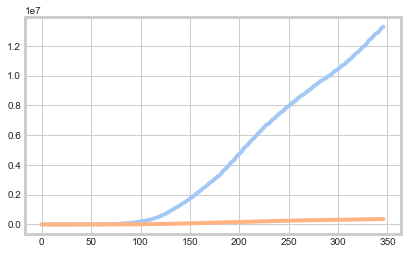

IndexingError: Too many indexers

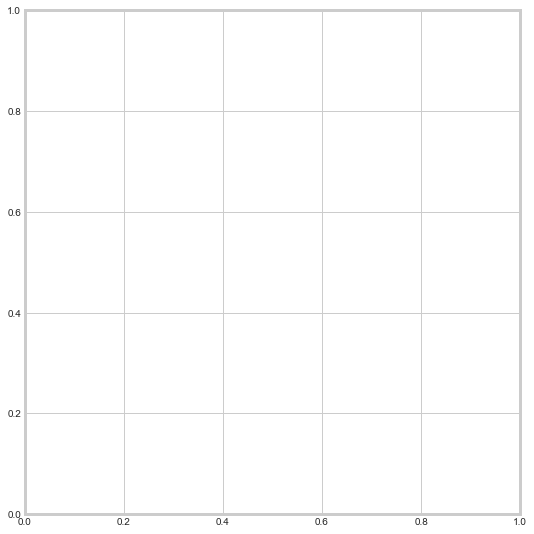

In [29]:
#visualize_covid_cases(range(len(SA['Cases'])),SA['Cases'])
#SA['Deaths']
len(SA['Cases'])
#visualize_covid_cases(SA['Cases'],SA['Deaths'])
plt.plot(range(len(SA['Cases'])), SA['Cases'])
plt.plot(range(len(SA['Deaths'])), SA['Deaths'])
plt.show()
visualize_covid_cases(SA['Cases'],SA['Deaths'])



**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

In [ ]:
#Insert your code here:


# Problem 12
    Visualize the covariance matrix for continents_df.

#Insert your code here:
confirm= pd.DataFrame(confirm.sum(axis=1))
deaths = pd.DataFrame(deaths.sum(axis=1))

recoveries = pd.DataFrame(recoveries_df.loc[:, cols[4]:])
recoveries = recoveries.groupby(by='Continent').sum().transpose()
recoveries = pd.DataFrame(recoveries.sum(axis=1))

variance_data = pd.concat([confirm,deaths,recoveries], axis=1)
variance_data.columns = ['Confirmed','Deaths','Recoveries']
variance_data['Active'] = variance_data['Confirmed'] - variance_data['Deaths'] - variance_data['Recoveries']
variance_data['Mortality Rate'] = round((variance_data['Deaths']/variance_data['Confirmed'])*100,2)
variance_data.corr()

In [30]:
continents_df.corr()

,Cases,Deaths,Recoveries,Active,Mortality Rate(%)
Cases,1.000000,0.971672,0.186429,0.731983,-0.278918
Deaths,0.971672,1.000000,0.258150,0.646842,-0.125505
Recoveries,0.186429,0.258150,1.000000,0.449969,0.139717
Active,0.731983,0.646842,0.449969,1.000000,-0.380875
Mortality Rate(%),-0.278918,-0.125505,0.139717,-0.380875,1.000000


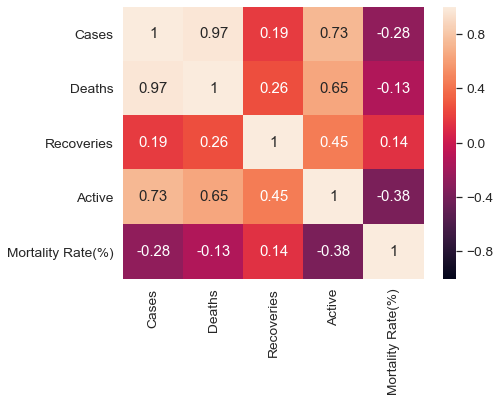

In [31]:
plt.figure(figsize=(6,5))
sns.set(font_scale=1.25)
hm = sns.heatmap(continents_df.corr(),vmin=-1, vmax=1, annot=True)

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

#Insert your code here:
#from previous problem, we have new_df is a dataframe include confirm, death,... with indexing by Continent, separate
total= continents_df.sum(axis=0)
total[0]
lst=[]
for i in range(len(continents_df.columns)):
    lst.append([continents_df.iloc[:,i]])
    
#from this list we have 4 list inside, which is confirmed, deaths, recoveries, active
continent_name = ['South America','Asia','Europe','Africa','North America','Australia','Orthers']
string=['Confirmed','Deaths','Recoveries','Active']
for i in range(len(string)):
    print("")
    plt.figure(figsize=[10,8])
    plt.pie(x=lst[i], autopct="%1.f%%", explode=[0.05]*8, startangle=20, labels=continent_name)
    #plt.legend(loc="best")
    plt.title('World Total {} COVID-19 Cases by Continents \n {}'.format(string[i],int(total[i])), fontsize=18)
    plt.show()



C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



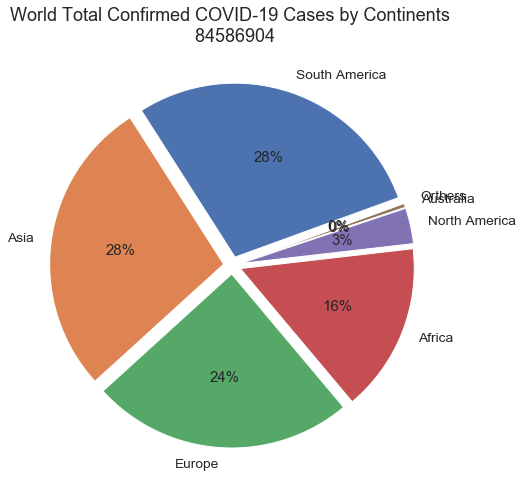

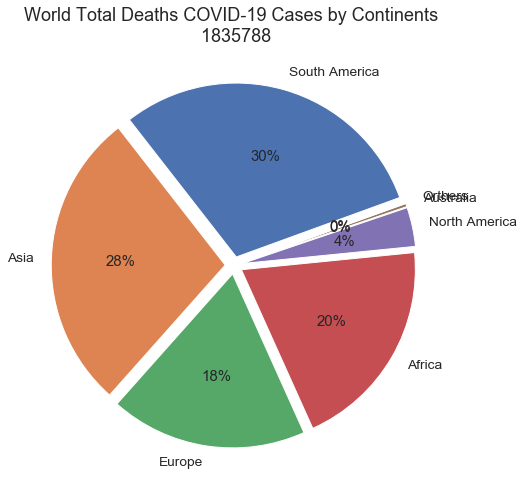

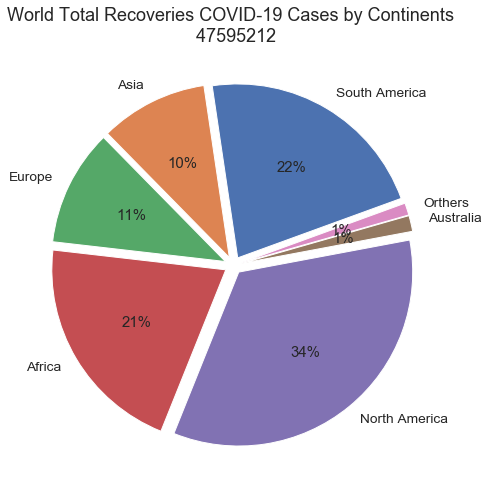

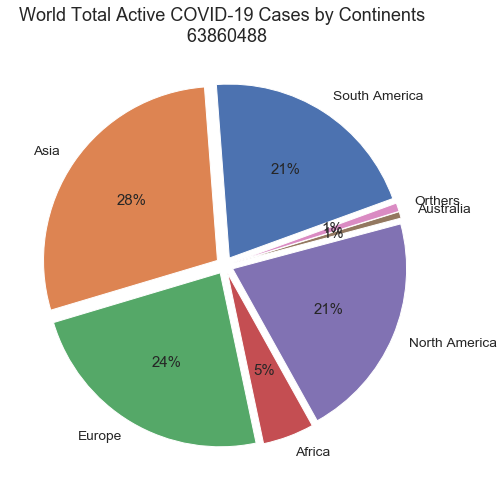

In [32]:
total= continents_df[['Cases','Deaths','Recoveries','Active']]
total= total.sum(axis=0)
#Take out every column
lst=[]
for i in range(len(continents_df.columns)):
    lst.append([continents_df.iloc[:,i]])

continent_name = ['South America','Asia','Europe','Africa','North America','Australia','Orthers']
string=['Confirmed','Deaths','Recoveries','Active']
for i in range(len(string)):
    print("")
    plt.figure(figsize=[10,8])
    plt.pie(x=lst[i], autopct="%1.f%%", explode=[0.05]*7, startangle=20, labels=continent_name)
    #plt.legend(loc="best")
    plt.title('World Total {} COVID-19 Cases by Continents \n {}'.format(string[i],int(total[i])), fontsize=18)
    plt.show()
    


# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [33]:
#Insert your code here:
# create a plain world map
data1= data_plus.reset_index()
world_map = folium.Map(location=[0, 0],  tiles="cartodbpositron", zoom_start=2)

from folium.plugins import MarkerCluster
incidents = MarkerCluster().add_to(world_map)

data1.replace(np.nan,'Unknown',inplace=True)
data1['Lat'].replace('Unknown',0, inplace=True)
data1['Long'].replace('Unknown',0, inplace=True)

for lat, long, country, confirm, dead, recover, mortality in zip(data1['Lat'],data1['Long'], 
                                                                 data1['Country/Region'], data1['Cases'], data1['Deaths'],
                                                                data1['Recoveries'],data1['Mortality Rate']):
    incidents.add_child(
        folium.CircleMarker(
            [lat, long],
            radius=10, # define how big you want the circle markers to be
            color='lightgreen',
            popup = ("""Country: {} \n Confirmed: {} \n Deaths: {} \n 
                        Recovered: {} \n Mortality Rate: {}%""".format(country, confirm, dead, recover, mortality)),
            fill=True,
            fill_opacity=0.2
        )
    )

world_map.add_child(incidents)



In [ ]:
findUK = folium.Map(location=[21.694000,-62.187366],  tiles="cartodbpositron", zoom_start=4)
findUK
#UK and France move to this point

# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [34]:
#Insert your code here:
import plotly.express as px

active = data1[['Country/Region','Active']]
active['log10'] = np.log10(active['Active'])
active.head(3)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in log10

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country/Region,Active,log10
0,Afghanistan,7608.0,3.881271
1,Albania,23448.0,4.370106
2,Algeria,29779.0,4.473910


In [39]:
fig = px.scatter(active, x="Active", y="log10", color="Country/Region")
fig.show()

# Problem 16
    Filter the top 10 countries baseđ on the number of confirmed cases.

In [40]:
data1.sort_values(by='Cases', ascending=False, inplace=True)
data1.reset_index(inplace=True)

In [41]:
#Insert your code here:
top10 = data1.head(10)
top10

,level_0,index,Country/Region,Lat,Long,Continent,Cases,Deaths,Recoveries,Active,Mortality Rate
0,0,177,USA,40.000000,-100.000000,North America,20426184,350186,14592.0,20061406.0,1.71
1,1,78,India,20.593684,78.962880,Asia,10323965,149435,76351.0,10098179.0,1.45
2,2,23,Brazil,-14.235000,-51.925300,South America,7716405,195725,6893256.0,627424.0,2.54
3,3,140,Russia,61.524010,105.318756,Europe,3179898,57235,102252.0,3020411.0,1.80
4,4,61,France,14.641500,-53.125800,Europe,2700480,65048,526629.0,2108803.0,2.41
5,5,181,United Kingdom,21.694000,-62.187366,Europe,2607542,74682,153441.0,2379419.0,2.86
6,6,176,Turkey,38.963700,35.243300,Asia,2232035,21295,0.0,2210740.0,0.95
7,7,84,Italy,41.871940,12.567380,Europe,2141201,74985,73252.0,1992964.0,3.50
8,8,161,Spain,40.463667,-3.749220,Europe,1928265,50837,2126432.0,-249004.0,2.64
9,9,65,Germany,51.165691,10.451526,Europe,1773540,34480,1004326.0,734734.0,1.94


# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [42]:
#top10.reset_index(inplace=True)
top10
lst_country=[]
for x in top10['Country/Region']:
    lst_country.append(x)
top10 = top10[['Deaths','Recoveries','Active']] #keep only 3 columns to draws

In [43]:
fig = go.Figure(data=[
    go.Bar(name='Deaths', x=lst_country, y=top10['Deaths']),
    go.Bar(name='Recoveries', x=lst_country, y=top10['Recoveries']),
    go.Bar(name='Active', x=lst_country, y=top10['Active']),
])
# Change the bar mode
fig.update_layout(barmode='stack',title_text='Top 10 Countries (Corfirmed)',xaxis_tickangle=45)
fig.show()

# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

In my opinion it is not reached its peak yet, confirmed line should look like a bell curve, by the central limit theorem, it has to follow it, then it should have the line looks like a bell curve, but still now, the graph only show a line with high slope and I haven't seen any sighnificant sign that it will slow down

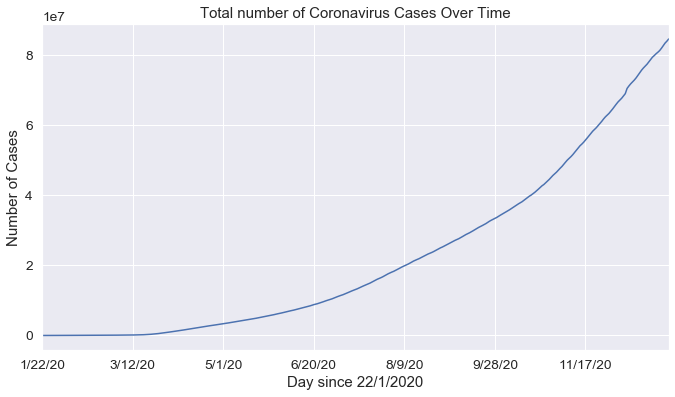

In [44]:
total_cases.plot(x=total_cases[0], y=total_cases[1],figsize=(10,6))
plt.xlabel("Day since 22/1/2020")
plt.ylabel("Number of Cases")
plt.title("Total number of Coronavirus Cases Over Time")
plt.show()

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


In [45]:
continents_df.sort_values(by='Mortality Rate(%)', ascending=False, inplace=True)
continents_df

,Cases,Deaths,Recoveries,Active,Mortality Rate(%)
Continent,,,,,
Australia,31518,945,538172.0,507599.0,3.00
South America,13281024,364313,9869551.0,3047160.0,2.74
Africa,2808452,66639,16198747.0,13456934.0,2.37
Europe,24099677,550313,10369678.0,13179686.0,2.28
North America,23429545,512189,4767722.0,18149634.0,2.19
Others,318197,5508,700448.0,387759.0,1.73
Asia,20618491,335881,5150894.0,15131716.0,1.63


19.1 Australia has the highest death rate, with 3%

In [46]:
#First need to find new confirmed cases group by continent in the latest 10 days
confirmed_df
confirm_10day = confirmed_df.loc[:, cols[-10]:]
confirm_10day['latest_10'] = confirm_10day.loc[:, cols[-1]] -confirm_10day.loc[:, cols[-10]]
latest_10day= confirm_10day[['Continent','latest_10']]
latest_10day=latest_10day.groupby(by=['Continent']).sum()
latest_10day
#then we need to find the number of activing covid 10 days before, took confirm - death - recoveries

,latest_10
Continent,
Africa,210321
Asia,687026
Australia,266
Europe,1801201
North America,1949047
Orthers,19100
South America,535905


In [47]:
confirm_num1 = pd.DataFrame(confirmed_df.loc[:, cols[-10]]) #data of confirmed 10days before
confirm_num = pd.DataFrame(confirmed_df['Continent']) #Continent dataframe
deaths = pd.DataFrame(deaths_df.loc[:, cols[-10]]) #death
recoveries = pd.DataFrame(recoveries_df.loc[:, cols[-10]]) #recoveries

confirm_num['Confirm'] = confirm_num1
confirm_num['Deaths'] = deaths
confirm_num['Recoveries'] = recoveries

In [48]:
#Recoveries column have missing value, we replace = 0
confirm_num.replace(np.nan,0,inplace=True)
#Then we shall groupby sum by continent, then calculate the active in 10 days before
active_10 =confirm_num.groupby(by=['Continent']).sum()
active_10['Active_10'] = abs(active_10['Confirm']-active_10['Deaths']-active_10['Recoveries'])
active_10
#something was wrong with data, but I will keep to work on it, for now, I use absolutely number
#so combine 2 dataframe
latest_10 = pd.concat([latest_10day,active_10], axis=1)
latest_10['Spread rate(%)']= round((latest_10['latest_10']/latest_10['Active_10'])*100,2)
latest_10
latest_10.sort_values(by='Spread rate(%)', ascending=False, inplace=True)
latest_10

,latest_10,Confirm,Deaths,Recoveries,Active_10,Spread rate(%)
Continent,,,,,,
South America,535905,12745119,353899,9305955.0,3085265.0,17.37
Europe,1801201,22298476,512570,9559217.0,12226689.0,14.73
North America,1949047,21480498,483629,4375341.0,16621528.0,11.73
Orthers,19100,299097,5064,652391.0,358358.0,5.33
Asia,687026,19931465,324764,4743324.0,14863377.0,4.62
Africa,210321,2598131,61431,15562101.0,13025401.0,1.61
Australia,266,31252,944,513438.0,483130.0,0.06


19.2 So South America have highest spread rate for the latest 10 days

In [49]:
latest_confirm = pd.DataFrame(confirmed_df.loc[:, cols[-1]:])
recoveries = pd.DataFrame(recoveries_df.loc[:, cols[-1]])
latest_confirm['latest_recoveries']= recoveries
latest_confirm=latest_confirm.groupby(by=['Continent']).sum()
latest_confirm.columns = ['latest_confirm','latest_recoveries']

latest_confirm['Recovery rate(%)'] = round((latest_confirm['latest_recoveries']/latest_confirm['latest_confirm'])*100,2)

latest_confirm.sort_values(by='Recovery rate(%)', ascending=False, inplace=True)
latest_confirm

,latest_confirm,latest_recoveries,Recovery rate(%)
Continent,,,
Australia,31518,538172.0,1707.51
Africa,2808452,16198747.0,576.79
Orthers,318197,700448.0,220.13
South America,13281024,9869551.0,74.31
Europe,24099677,10369678.0,43.03
Asia,20618491,5150894.0,24.98
North America,23429545,4767722.0,20.35


# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

20.1 The country has the highest death rate is Yemen

In [50]:
#As we have data_plus as a data for each country
data_plus.head(3)

,Lat,Long,Continent,Cases,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,,,
Afghanistan,33.93911,67.709953,Asia,51526,2191,41727.0,7608.0,4.25
Albania,41.15330,20.168300,Europe,58991,1190,34353.0,23448.0,2.02
Algeria,28.03390,1.659600,Africa,100159,2769,67611.0,29779.0,2.76


In [51]:
death_rate = pd.DataFrame()
death_rate['Death Rate'] = round((data_plus['Deaths']/data_plus['Cases'])*100,2)
death_rate.sort_values(by='Death Rate', ascending=False, inplace=True)
death_rate.head(1)

,Death Rate
Country/Region,
Yemen,29.03


In [52]:
country_confirm = confirmed_df.groupby('Country/Region').sum()
yesterday = country_confirm.iloc[:,-1:]; yesterday.columns=['yesterday']
last10= country_confirm.iloc[:,-10:-9]; last10.columns=['last10']
latest10 = pd.concat([yesterday,last10], axis=1)
latest10['new_cases'] = latest10['yesterday'] -latest10['last10']
latest10.head(3)
#next we will find active
country_deaths = deaths_df.groupby('Country/Region').sum()
country_recoveries = recoveries_df.groupby('Country/Region').sum()

last10_death= country_deaths.iloc[:,-10:-9]; last10_death.columns=['last10_1']
last10_reco= country_recoveries.iloc[:,-10:-9]; last10_reco.columns=['last10_2']
last10_death

active = pd.concat([last10,last10_death,last10_reco], axis=1)
active['Active'] = active['last10'] - active['last10_1'] - active['last10_2']

active['Spread rate(%)'] = round((active['Active']/latest10['new_cases'])*100,2)
active.replace([np.inf, -np.inf, np.nan], 0, inplace=True) #replace all 0 spread rate
active.sort_values(by='Spread rate(%)', ascending=False, inplace=True)
active.head(1)

,last10,last10_1,last10_2,Active,Spread rate(%)
Country/Region,,,,,
Central African Republic,4948,63,1924,2961,19740.0


20.2 Central African Republic has the highest spread rate

In [53]:
latest_reco= country_recoveries.iloc[:,-1:]; latest_reco.columns=['recoveries']
latest_reco['confirmed']= latest10['yesterday']
latest_reco['Recovery rate']= round((latest_reco['recoveries']/latest10['yesterday'])*100,2)

latest_reco.sort_values(by='Recovery rate', ascending=False, inplace=True)
latest_reco.head(10)

,recoveries,confirmed,Recovery rate
Country/Region,,,
El Salvador,45960,45960,100.00
Vanuatu,1,1,100.00
Marshall Islands,4,4,100.00
Samoa,2,2,100.00
Singapore,58476,58662,99.68
Djibouti,5738,5841,98.24
Qatar,141680,144240,98.23
Diamond Princess,699,712,98.17
Gabon,9388,9571,98.09


# Problem 21
**USA dataset**

In [54]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

21.1 Which state has the highest death rate over states' dataset?


In [55]:
death_rate = us_medical_data[['Province_State','Confirmed','Deaths']]
death_rate['Death Rate'] = round((death_rate['Deaths']/death_rate['Confirmed'])*100,2)
death_rate.replace(np.nan,0,inplace=True)
death_rate.sort_values(by='Death Rate', ascending=False, inplace=True)
death_rate.head(3)


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Province_State,Confirmed,Deaths,Death Rate
7,Connecticut,46976,4338,9.23
34,New Jersey,173611,15229,8.77
26,Michigan,73267,6221,8.49


Connecticut state has the highest death rate over states' dataset

21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
Spread rate = Number of new confirmed in the last 10 days / number of active before) ??
So I picked Incident_Rate

In [56]:
us_medical_data.sort_values(by='Incident_Rate', ascending=False, inplace=True)
us_medical_data.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
36,New York,US,2020-07-07 04:34:13,42.1657,-74.9481,397649,32219,71040.0,294390.0,36,2044.093624,4288131.0,89995.0,8.102372,84000036,USA,22042.910293,22.631768
34,New Jersey,US,2020-07-07 04:34:13,40.2989,-74.5210,173611,15229,30729.0,127653.0,34,1954.596783,1549209.0,20237.0,8.771910,84000034,USA,17441.745786,11.656519
45,Rhode Island,US,2020-07-07 04:34:13,41.6809,-71.5118,16991,960,1657.0,14374.0,44,1603.891402,250954.0,2019.0,5.650050,84000044,USA,23689.186217,11.882761
25,Massachusetts,US,2020-07-07 04:34:13,42.2302,-71.5301,110137,8198,93157.0,8782.0,25,1597.924586,899417.0,11469.0,7.443457,84000025,USA,13049.207233,10.413394
10,District of Columbia,US,2020-07-07 04:34:13,38.8974,-77.0268,10515,561,1553.0,8401.0,11,1489.906468,107650.0,NaN,5.335235,84000011,USA,15253.298269,NaN


New York is the highest
20.3 Which state has the highest recoveries rate over states' dataset?

In [57]:
us_medical_data['Recover Rate'] = round((us_medical_data['Recovered']/us_medical_data['Confirmed'])*100,2)
us_medical_data.sort_values(by='Recover Rate', ascending=False, inplace=True)
us_medical_data.head(3)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Recover Rate
27,Minnesota,US,2020-07-07 04:34:13,45.6945,-93.9002,38569,1511,33907.0,3151.0,27,683.892140,679693.0,4219.0,3.917654,84000027,USA,12052.080703,10.938837,87.91
38,North Dakota,US,2020-07-07 04:34:13,47.5289,-99.7840,3849,80,3350.0,419.0,38,505.077015,113582.0,245.0,2.078462,84000038,USA,14904.561571,6.365290,87.04
47,South Dakota,US,2020-07-07 04:34:13,44.2998,-99.4388,7105,97,6063.0,945.0,46,803.134315,84303.0,692.0,1.365236,84000046,USA,9529.434505,9.739620,85.33


# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [58]:
#Insert your code here:
us_medical_data.sort_values(by='Confirmed', ascending=False, inplace=True)
top10 = us_medical_data.head(10)
top10.columns
top10=top10[['Confirmed', 'Deaths', 'Recovered', 'Active','Incident_Rate',
             'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate']]


In [59]:
#For the np.nan value, I will pick median value, then calculate the covariance matrix
top10

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
36,397649,32219,71040.0,294390.0,2044.093624,4288131.0,89995.0,8.102372,22042.910293,22.631768
5,271035,6441,NaN,264594.0,685.952294,4793353.0,NaN,2.376446,12131.316935,NaN
11,206447,3778,NaN,202669.0,961.213930,2233940.0,16352.0,1.830010,10401.188915,7.920677
49,205653,2782,103782.0,99183.0,709.211077,2163729.0,NaN,1.301777,7462.194372,NaN
34,173611,15229,30729.0,127653.0,1954.596783,1549209.0,20237.0,8.771910,17441.745786,11.656519
17,147865,7026,NaN,140839.0,1166.880435,1783962.0,NaN,4.751632,14078.181818,NaN
25,110137,8198,93157.0,8782.0,1597.924586,899417.0,11469.0,7.443457,13049.207233,10.413394
3,101455,1829,11836.0,87790.0,1393.858286,617841.0,5188.0,1.802770,8488.322873,5.113597
12,97064,2878,NaN,94186.0,914.195469,958953.0,11919.0,2.965054,9031.880900,12.279527
43,95100,6754,70437.0,17909.0,742.853318,833324.0,NaN,7.101998,6509.332261,NaN


In [60]:
top10.corr()
#Independence variable is Confirmed
#I will pick up 5 highest correlation with confirm, which is:
#Deaths, Active, People_tested, People_Hospitalized, Hospitalization_Rate

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Confirmed,1.000000,0.743458,0.208591,0.886405,0.303570,0.910756,0.958555,0.123404,0.681717,0.825399
Deaths,0.743458,1.000000,0.025499,0.528439,0.744992,0.514065,0.944100,0.703584,0.893091,0.913582
Recovered,0.208591,0.025499,1.000000,-0.114813,-0.383680,0.282174,0.362588,0.005180,-0.100167,0.515502
Active,0.886405,0.528439,-0.114813,1.000000,0.159649,0.902357,0.816977,-0.111532,0.589332,0.648051
Incident_Rate,0.303570,0.744992,-0.383680,0.159649,1.000000,0.022462,0.607141,0.699446,0.819689,0.569862
People_Tested,0.910756,0.514065,0.282174,0.902357,0.022462,1.000000,0.946757,-0.046428,0.515249,0.831344
People_Hospitalized,0.958555,0.944100,0.362588,0.816977,0.607141,0.946757,1.000000,0.510513,0.853925,0.927954
Mortality_Rate,0.123404,0.703584,0.005180,-0.111532,0.699446,-0.046428,0.510513,1.000000,0.633846,0.634814
Testing_Rate,0.681717,0.893091,-0.100167,0.589332,0.819689,0.515249,0.853925,0.633846,1.000000,0.848077
Hospitalization_Rate,0.825399,0.913582,0.515502,0.648051,0.569862,0.831344,0.927954,0.634814,0.848077,1.000000


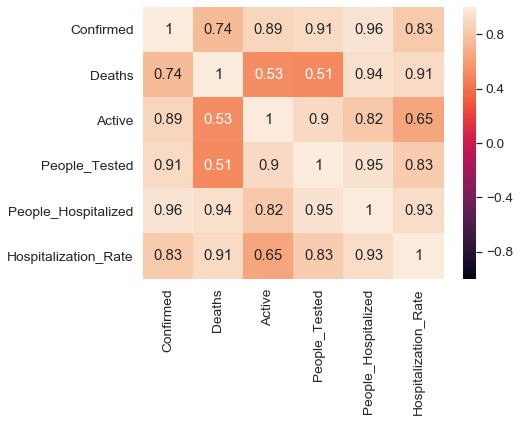

In [61]:
top10=top10[['Confirmed', 'Deaths', 'Active','People_Tested', 'People_Hospitalized', 'Hospitalization_Rate']]
plt.figure(figsize=(6,5))
sns.set(font_scale=1.25)
hm = sns.heatmap(top10.corr(),vmin=-1, vmax=1, annot=True)
#as we seen, People_tested People_Hospitalized and Hospitalization_Rate, Active have a strong connection with each orther
#in that, People_tested have strong positive correlation with confirmed but also not strong with Deaths, we will choose this
top10=top10[['Confirmed', 'Deaths', 'People_Tested']]

In [62]:
#This is the final variable we need to use
top10_x = top10[['Deaths','People_Tested']]
top10_y = top10[['Confirmed']]
top10

,Confirmed,Deaths,People_Tested
36,397649,32219,4288131.0
5,271035,6441,4793353.0
11,206447,3778,2233940.0
49,205653,2782,2163729.0
34,173611,15229,1549209.0
17,147865,7026,1783962.0
25,110137,8198,899417.0
3,101455,1829,617841.0
12,97064,2878,958953.0
43,95100,6754,833324.0


The Pearson Correlation Coefficient is 0.7434584882762082  with a P-value of P = 0.013716958165583342
The Pearson Correlation Coefficient is 0.9107560132759525  with a P-value of P = 0.0002488904568466675


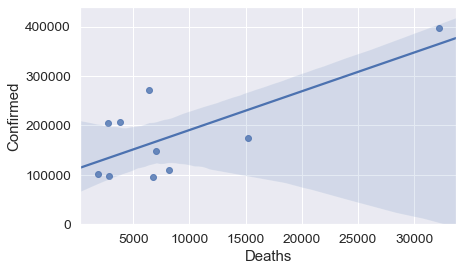

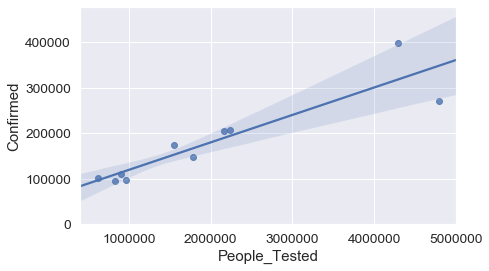

In [70]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(top10['Deaths'], top10['Confirmed'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(top10['People_Tested'], top10['Confirmed'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
sns.regplot(x="Deaths", y="Confirmed", data=top10)
plt.ylim(0,)
plt.show()
sns.regplot(x="People_Tested", y="Confirmed", data=top10)
plt.ylim(0,)
plt.show()

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(top10_x,top10_y)
print(model.coef_,model.intercept_)
#The model is
print('y= {}*Deaths + {}*People_tested + {}'.format(model.coef_[0][0],model.coef_[0][1],model.intercept_[0]))

[[3.9462717  0.04762872]] [50378.323527]
y= 3.9462716972133918*Deaths + 0.04762871694235713*People_tested + 50378.323526998705


In [65]:
#I will try for the 11th of states
us_medical_data.loc[11]

Province_State                      Florida
Country_Region                           US
Last_Update             2020-07-07 04:34:13
Lat                                 27.7663
Long_                              -81.6868
Confirmed                            206447
Deaths                                 3778
Recovered                               NaN
Active                               202669
FIPS                                     12
Incident_Rate                       961.214
People_Tested                   2.23394e+06
People_Hospitalized                   16352
Mortality_Rate                      1.83001
UID                                84000012
ISO3                                    USA
Testing_Rate                        10401.2
Hospitalization_Rate                7.92068
Recover Rate                            NaN
Name: 11, dtype: object

In [66]:
#Deaths = 3778; People_Tested = 2.23394e+06
#Real number is = 206447
y= 3.9462716972133918*3778 + 0.04762871694235713*2.23394e+06 + 50378.323526998705
y

171687.0339252802

In [67]:
predict = model.predict(top10_x)
predict=  pd.DataFrame(predict)
top10_y.reset_index(inplace=True)
result = pd.concat([predict, top10_y], axis=1)
del result['index']

result.columns = [['Predict', 'Result']]

In [68]:
result
top10

,Confirmed,Deaths,People_Tested
36,397649,32219,4288131.0
5,271035,6441,4793353.0
11,206447,3778,2233940.0
49,205653,2782,2163729.0
34,173611,15229,1549209.0
17,147865,7026,1783962.0
25,110137,8198,899417.0
3,101455,1829,617841.0
12,97064,2878,958953.0
43,95100,6754,833324.0
